**Flight_Price_Prediction**

In [56]:
# importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
# Read the both csv files 
business = pd.read_csv("/content/business.csv")
economy = pd.read_csv("/content/economy.csv")

In [58]:
# prints the first five rows of the business dataset
business.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [59]:
# prints the first five rows of the economy dataset
economy.head(5) 

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [60]:
# Check for number of rows and columns in both datasets 
print(business.shape)
print(   )
print(economy.shape)

(93487, 11)

(206774, 11)


**Merging the two CSV files** 

In [61]:
# merging the two csv files which having the identical columns
fpp = pd.concat([business, economy]) 

In [62]:
# prints the first five rows of merged dataset along with all columns 
fpp.head(5) 

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [63]:
# prints last five rows of a merged dataset along with all columns 
fpp.tail(5) 

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206773,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640"


In [64]:
# check for the number of rows and columns on merged dataset
fpp.shape 

(300261, 11)

**Checking for the non-null values present in the columns**

In [65]:
fpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.5+ MB


**Checking for the Missing Values**

In [66]:
pd.DataFrame([fpp.isna().sum()/fpp.shape[0]*100], index=['% of Null Values']).T.style.background_gradient(cmap='summer_r')

,% of Null Values
date,0.000000
airline,0.000000
ch_code,0.000000
num_code,0.000000
dep_time,0.000000
from,0.000000
time_taken,0.000000
stop,0.000000
arr_time,0.000000
to,0.000000


It can be clear shows that there is no missing(null-values) present in the dataset.

**Checking for the duplicated values in the dataset and drop the duplicated values if present**

In [67]:
print(f"This data has {fpp.duplicated().sum()} duplicated data")

This data has 2 duplicated data


In [68]:
fpp.drop_duplicates(keep='first', inplace=True)

In [69]:
print(f"This data has {fpp.duplicated().sum()} duplicated data")

This data has 0 duplicated data


In [70]:
fpp.shape

(300259, 11)

In [71]:
fpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300259 non-null  object
 1   airline     300259 non-null  object
 2   ch_code     300259 non-null  object
 3   num_code    300259 non-null  int64 
 4   dep_time    300259 non-null  object
 5   from        300259 non-null  object
 6   time_taken  300259 non-null  object
 7   stop        300259 non-null  object
 8   arr_time    300259 non-null  object
 9   to          300259 non-null  object
 10  price       300259 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.5+ MB


In [72]:
fpp.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [73]:
fpp.nunique()

date             49
airline           8
ch_code           8
num_code       1255
dep_time        251
from              6
time_taken      483
stop             40
arr_time        266
to                6
price         12165
dtype: int64

**EDA process**

In [74]:
# because the date columns is in string format which having the non-numeric character '-' in between the date components. 
# To solve this error convert the "date" column to a datetime data type which converts into int type. 
# spliting the date column into day, month, year to convert into integers

fpp["day"] = pd.to_datetime(fpp.date, format='%d-%m-%Y').dt.day # dt.day will extracting only day from each date and assign to new column day
fpp["month"] = pd.to_datetime(fpp.date, format='%d-%m-%Y').dt.month # dt.month will extracting only month from each date and assign to new column month
fpp["year"] = pd.to_datetime(fpp.date, format='%d-%m-%Y').dt.year # dt.year # dt.year will extracting only year from each date and assign to new column year

In [75]:
fpp.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,day,month,year
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",11,2,2022
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",11,2,2022
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",11,2,2022
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",11,2,2022
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",11,2,2022


In [76]:
fpp.drop(['date'], axis=1, inplace=True) # Hence the date column is splited we can drop the date column

In [77]:
fpp.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,day,month,year
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",11,2,2022
1,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",11,2,2022
2,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",11,2,2022
3,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",11,2,2022
4,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",11,2,2022


In [78]:
# because the time format is in hh:mm format and contains a colon, which is not a numeric character. 
# To solve this error convert the "dep_time" column to a datetime data type which converts into int type. 

In [79]:
#similarly split the departure time into hours and minutes inorder to convert the data type of the departure time
fpp["dep_hour"] = pd.to_datetime(fpp['dep_time']).dt.hour # dt.hour will extracting only hour from each dep_time and assign to new column hour
fpp["dep_min"] = pd.to_datetime(fpp['dep_time']).dt.minute # dt.minute will extracting only minutes from each dep_time and assign to new column minutes

In [80]:
fpp.drop(['dep_time'], axis=1, inplace=True) # Hence the dep_time column is splited we can drop the date column

In [81]:
fpp.head(5)

,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,price,day,month,year,dep_hour,dep_min
0,Air India,AI,868,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",11,2,2022,18,0
1,Air India,AI,624,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",11,2,2022,19,0
2,Air India,AI,531,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",11,2,2022,20,0
3,Air India,AI,839,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",11,2,2022,21,25
4,Air India,AI,544,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",11,2,2022,17,15


In [82]:
# because the time format is in hh:mm format and contains a colon, which is not a numeric character. 
# To solve this error convert the "arr_time" column to a datetime data type which converts into int type.

In [83]:
#similarly split the arriving time into hours and minutes inorder to convert the data type of the arriving time

fpp["arr_hour"] = pd.to_datetime(fpp['arr_time']).dt.hour # dt.hour will extracting only hour from each arr_time and assign to new column hour
fpp["arr_min"] = pd.to_datetime(fpp['arr_time']).dt.minute # dt.minute will extracting only minute from each arr_time and assign to new column minutes



In [84]:
fpp.drop(['arr_time'], axis=1, inplace=True) # Hence the arr_time column is splited we can drop the date column
fpp.head(5)

,airline,ch_code,num_code,from,time_taken,stop,to,price,day,month,year,dep_hour,dep_min,arr_hour,arr_min
0,Air India,AI,868,Delhi,02h 00m,non-stop,Mumbai,"25,612",11,2,2022,18,0,20,0
1,Air India,AI,624,Delhi,02h 15m,non-stop,Mumbai,"25,612",11,2,2022,19,0,21,15
2,Air India,AI,531,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,0,20,45
3,Air India,AI,839,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,21,25,23,55
4,Air India,AI,544,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,17,15,23,55


In [85]:
# Specifically, it looks like there is a string value in the "time_taken" column that cannot be converted to a valid datetime object.
# the error due to a formatting issue or a data entry error.

In [86]:
# time_taken column is a duration time column 
# splitting the time_taken column values into hours and minutes  
duration=list(fpp['time_taken']) # it creates a list of all the values in the "time_taken" column
for i in range(len(duration)):   # it ranges of len of duration to itirate each values of duration list
    if len(duration[i].split(' '))==2: # it checks if the duration string has two parts separated by a space character. If the length of this list is 2, it means that the duration string has the expected format.
        pass                           # if the duration has the expected format it pass the statement
    else:                               # if the duration does not have the expected format 
        if 'h' in duration[i]: # Check if duration contains only h which means hour for each value of duration
             duration[i]=duration[i] + ' 0m' # adding 0 minutes that gives only hour
        else:
             duration[i]='0h '+ duration[i] # if duration contains only minutes then it adds 0 hours that gives only minutes

In [87]:
# beacuse of adding the 0 values null values are formed

In [88]:
fpp['time_taken']=duration # assinging duration list to time_taken column to update the values of column

In [89]:
def hour(x):  # the function splits the string at the space character and takes the first element value, excluding the last character "h" .
    return x.split(' ')[0][0:-1] # it extract the hour value from the input string x and remove the "h" character 

def minutes(x):
    return x.split(' ')[1][0:-1] # it extract the minute value from the input string x and remove the "m" character

In [90]:
fpp['dur_hour']=fpp['time_taken'].apply(hour)  # it will applies the hour function to the time_taken column and assigns the resulting  hour values to a new column called dur_hour.
fpp['dur_min']=fpp['time_taken'].apply(minutes)


In [91]:
fpp.head(5)

,airline,ch_code,num_code,from,time_taken,stop,to,price,day,month,year,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,Air India,AI,868,Delhi,02h 00m,non-stop,Mumbai,"25,612",11,2,2022,18,0,20,0,02,00
1,Air India,AI,624,Delhi,02h 15m,non-stop,Mumbai,"25,612",11,2,2022,19,0,21,15,02,15
2,Air India,AI,531,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,0,20,45,24,45
3,Air India,AI,839,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,21,25,23,55,26,30
4,Air India,AI,544,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,17,15,23,55,06,40


In [92]:
fpp.drop(['time_taken'], axis=1, inplace=True) # Hence the time_taken column is splited we can drop the date column
fpp.head(5)

,airline,ch_code,num_code,from,stop,to,price,day,month,year,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,Air India,AI,868,Delhi,non-stop,Mumbai,"25,612",11,2,2022,18,0,20,0,02,00
1,Air India,AI,624,Delhi,non-stop,Mumbai,"25,612",11,2,2022,19,0,21,15,02,15
2,Air India,AI,531,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,0,20,45,24,45
3,Air India,AI,839,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,21,25,23,55,26,30
4,Air India,AI,544,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,17,15,23,55,06,40


In [93]:
# because of spliting of string with space character there are some empty strings are formed and will cause an error during convert into int
# there are empty strings ('') in either the 'dur_hour' or 'dur_min', so need to fix this before converting it to int or float values 
# Filter out the rows with empty strings, this will remove any rows with empty strings in either column before converting to float
fpp = fpp[fpp['dur_hour'] != '']
fpp = fpp[fpp['dur_min'] != '']
fpp['dur_hour'] = fpp['dur_hour'].astype(float)
fpp['dur_min'] = fpp['dur_min'].astype(float)

# Replace the empty strings with NaN (Not a Number) using the numpy.nan value, which can be converted to a floating-point number without issue
#This will replace the empty strings with NaN, which can be handled by functions that work with floating-point numbers. 
fpp['dur_hour'] = fpp['dur_hour'].replace('', np.nan).astype(float)
fpp['dur_min'] = fpp['dur_min'].replace('', np.nan).astype(float)

In [94]:
# Round the floating-point values to the nearest integer using the round() function before converting them to integers
fpp['dur_hour'] = round(fpp['dur_hour']).astype(int)
fpp['dur_min'] = round(fpp['dur_min']).astype(int)



In [95]:
fpp['price'] = fpp['price'].str.replace(',', '').astype(int) # it removes the ',' which is prsent in the price values and convert it into int data type

In [96]:
fpp.dtypes

airline     object
ch_code     object
num_code     int64
from        object
stop        object
to          object
price        int64
day          int64
month        int64
year         int64
dep_hour     int64
dep_min      int64
arr_hour     int64
arr_min      int64
dur_hour     int64
dur_min      int64
dtype: object

In [97]:
fpp.isna().sum()

airline     0
ch_code     0
num_code    0
from        0
stop        0
to          0
price       0
day         0
month       0
year        0
dep_hour    0
dep_min     0
arr_hour    0
arr_min     0
dur_hour    0
dur_min     0
dtype: int64

In [98]:
fpp.duplicated().sum()

0

In [99]:
fpp.shape

(300255, 16)

In [100]:
# seperating the categorical columnas and numerical columns

fpp_cat_colms = [column for column in fpp.columns if fpp[column].dtype=='object']
print(fpp_cat_colms)

print(' ')

fpp_num_colms = [column for column in fpp.columns if fpp[column].dtype!='object']
print(fpp_num_colms)

['airline', 'ch_code', 'from', 'stop', 'to']
 
['num_code', 'price', 'day', 'month', 'year', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min', 'dur_hour', 'dur_min']


In [101]:
fpp.head()

,airline,ch_code,num_code,from,stop,to,price,day,month,year,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,Air India,AI,868,Delhi,non-stop,Mumbai,25612,11,2,2022,18,0,20,0,2,0
1,Air India,AI,624,Delhi,non-stop,Mumbai,25612,11,2,2022,19,0,21,15,2,15
2,Air India,AI,531,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,42220,11,2,2022,20,0,20,45,24,45
3,Air India,AI,839,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,44450,11,2,2022,21,25,23,55,26,30
4,Air India,AI,544,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,46690,11,2,2022,17,15,23,55,6,40


In [102]:
# converting categorical values to numerical values 
fpp = pd.get_dummies(data=fpp, columns=['airline', 'from', 'to', 'ch_code'], drop_first=True)
fpp.head(5)

,num_code,stop,price,day,month,year,dep_hour,dep_min,arr_hour,arr_min,...,to_Hyderabad,to_Kolkata,to_Mumbai,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,868,non-stop,25612,11,2,2022,18,0,20,0,...,0,0,1,0,1,0,0,0,0,0
1,624,non-stop,25612,11,2,2022,19,0,21,15,...,0,0,1,0,1,0,0,0,0,0
2,531,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,42220,11,2,2022,20,0,20,45,...,0,0,1,0,1,0,0,0,0,0
3,839,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,44450,11,2,2022,21,25,23,55,...,0,0,1,0,1,0,0,0,0,0
4,544,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,46690,11,2,2022,17,15,23,55,...,0,0,1,0,1,0,0,0,0,0


In [103]:
fpp.shape

(300255, 36)

In [104]:
fpp['stop'].nunique()

40

In [105]:
fpp['stop'].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243599
non-stop                                                                         36044
2+-stop                                                                          13286
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [106]:
# the pd_getdummies can not be applied to the 'stop' column, because it contains more number of unique values
# if one hot encode is applied then the input data for the model becomes very wide
# the created features become sparse(most of the levels hardly appear in the data)
# One Hot Encoding does not handle new or unseen categories
# for this can use the label encoder, it can handel high number of unique values 

In [107]:
# applying label encoder 
from sklearn.preprocessing import LabelEncoder 

fpp_lable = LabelEncoder() 

fpp[ 'stop' ]= fpp_lable.fit_transform(fpp[ 'stop' ])   
print(fpp[ 'stop' ].unique())  
print("Data Frame after Label Encoding:\n")  
fpp.head(5)

[39  0 11 14  3 21 34 10  6 38  8  5 36 27 12 32 29 31 30 20  9  4  2  1
 35 15  7 28 26 37 23 24 18 22 19 17 33 13 16 25]
Data Frame after Label Encoding:



,num_code,stop,price,day,month,year,dep_hour,dep_min,arr_hour,arr_min,...,to_Hyderabad,to_Kolkata,to_Mumbai,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,868,39,25612,11,2,2022,18,0,20,0,...,0,0,1,0,1,0,0,0,0,0
1,624,39,25612,11,2,2022,19,0,21,15,...,0,0,1,0,1,0,0,0,0,0
2,531,0,42220,11,2,2022,20,0,20,45,...,0,0,1,0,1,0,0,0,0,0
3,839,0,44450,11,2,2022,21,25,23,55,...,0,0,1,0,1,0,0,0,0,0
4,544,0,46690,11,2,2022,17,15,23,55,...,0,0,1,0,1,0,0,0,0,0


In [108]:
fpp.dtypes

num_code            int64
stop                int64
price               int64
day                 int64
month               int64
year                int64
dep_hour            int64
dep_min             int64
arr_hour            int64
arr_min             int64
dur_hour            int64
dur_min             int64
airline_AirAsia     uint8
airline_GO FIRST    uint8
airline_Indigo      uint8
airline_SpiceJet    uint8
airline_StarAir     uint8
airline_Trujet      uint8
airline_Vistara     uint8
from_Chennai        uint8
from_Delhi          uint8
from_Hyderabad      uint8
from_Kolkata        uint8
from_Mumbai         uint8
to_Chennai          uint8
to_Delhi            uint8
to_Hyderabad        uint8
to_Kolkata          uint8
to_Mumbai           uint8
ch_code_6E          uint8
ch_code_AI          uint8
ch_code_G8          uint8
ch_code_I5          uint8
ch_code_S5          uint8
ch_code_SG          uint8
ch_code_UK          uint8
dtype: object

In [109]:
fpp['airline_AirAsia'] = fpp['airline_AirAsia'].astype(int)
fpp['airline_GO FIRST'] = fpp['airline_GO FIRST'].astype(int)
fpp['airline_Indigo'] = fpp['airline_Indigo'].astype(int)
fpp['airline_SpiceJet'] = fpp['airline_SpiceJet'].astype(int)
fpp['airline_StarAir'] = fpp['airline_StarAir'].astype(int)
fpp['airline_Trujet'] = fpp['airline_Trujet'].astype(int)
fpp['airline_Vistara'] = fpp['airline_Vistara'].astype(int)
fpp['from_Chennai'] = fpp['from_Chennai'].astype(int)
fpp['from_Delhi'] = fpp['from_Delhi'].astype(int)
fpp['from_Hyderabad'] = fpp['from_Hyderabad'].astype(int)
fpp['from_Kolkata'] = fpp['from_Kolkata'].astype(int)
fpp['from_Mumbai'] = fpp['from_Mumbai'].astype(int)
fpp['to_Chennai'] = fpp['to_Chennai'].astype(int)
fpp['to_Delhi'] = fpp['to_Delhi'].astype(int)
fpp['to_Hyderabad'] = fpp['to_Hyderabad'].astype(int)
fpp['to_Kolkata'] = fpp['to_Kolkata'].astype(int)
fpp['to_Mumbai'] = fpp['to_Mumbai'].astype(int)
fpp['ch_code_6E'] = fpp['ch_code_6E'].astype(int)
fpp['ch_code_AI'] = fpp['ch_code_AI'].astype(int)
fpp['ch_code_G8'] = fpp['ch_code_G8'].astype(int)
fpp['ch_code_I5'] = fpp['ch_code_I5'].astype(int)
fpp['ch_code_S5'] = fpp['ch_code_S5'].astype(int)
fpp['ch_code_SG'] = fpp['ch_code_SG'].astype(int)
fpp['ch_code_UK'] = fpp['ch_code_UK'].astype(int)

In [110]:
fpp.dtypes

num_code            int64
stop                int64
price               int64
day                 int64
month               int64
year                int64
dep_hour            int64
dep_min             int64
arr_hour            int64
arr_min             int64
dur_hour            int64
dur_min             int64
airline_AirAsia     int64
airline_GO FIRST    int64
airline_Indigo      int64
airline_SpiceJet    int64
airline_StarAir     int64
airline_Trujet      int64
airline_Vistara     int64
from_Chennai        int64
from_Delhi          int64
from_Hyderabad      int64
from_Kolkata        int64
from_Mumbai         int64
to_Chennai          int64
to_Delhi            int64
to_Hyderabad        int64
to_Kolkata          int64
to_Mumbai           int64
ch_code_6E          int64
ch_code_AI          int64
ch_code_G8          int64
ch_code_I5          int64
ch_code_S5          int64
ch_code_SG          int64
ch_code_UK          int64
dtype: object

**Checking for an outliers**

In [111]:
fpp_num_colms = [column for column in fpp.columns if fpp[column].dtype!='object']
print(fpp_num_colms)

['num_code', 'stop', 'price', 'day', 'month', 'year', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min', 'dur_hour', 'dur_min', 'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet', 'airline_Vistara', 'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai', 'ch_code_6E', 'ch_code_AI', 'ch_code_G8', 'ch_code_I5', 'ch_code_S5', 'ch_code_SG', 'ch_code_UK']


num_code
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([637., 203.]), array([ 927., 1321.])]

caps: [array([203, 203]), array([1321, 1321])]

boxes: [array([637., 637., 927., 927., 637.])]

medians: [array([818., 818.])]

fliers: [array([ 101,  103,  165, ..., 6215, 2462, 7193])]

means: []



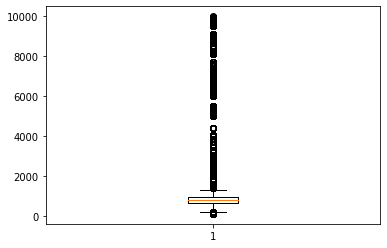

******************************************************************************************
stop
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([39, 39, 39, ..., 39, 39, 39])]

means: []



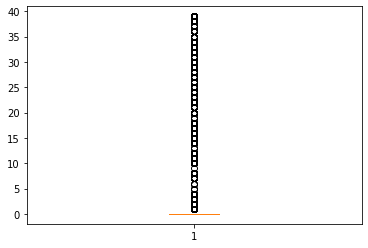

******************************************************************************************
price
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([4783., 1105.]), array([42521., 98972.])]

caps: [array([1105, 1105]), array([98972, 98972])]

boxes: [array([ 4783.,  4783., 42521., 42521.,  4783.])]

medians: [array([7425., 7425.])]

fliers: [array([114434, 116562, 100395,  99129, 101369, 117307, 105961, 102114,
       102114, 102114, 102114, 102114, 110850, 110872, 102114, 102114,
       102114, 114507, 104987, 104466, 104466, 100288, 100288, 100473,
       100473, 103335,  99577, 111437,  99403, 101531, 102404, 102404,
       105764, 105764, 105764, 111163, 114523,  99403, 100276, 101844,
       101844, 101844, 105764, 100276, 102404, 101531, 100909,  99677,
       108604, 111964, 106476, 111964, 100204, 111883,  99451, 103819,
        99680, 101920, 105168, 107576, 100111, 100671, 101780, 104031,
       107492, 123071, 102648, 108360, 102648, 1017

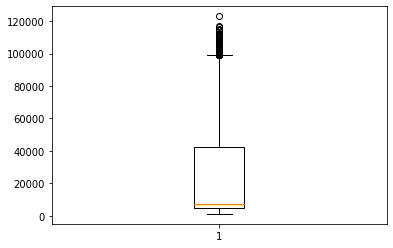

******************************************************************************************
day
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([12.,  1.]), array([24., 31.])]

caps: [array([1, 1]), array([31, 31])]

boxes: [array([12., 12., 24., 24., 12.])]

medians: [array([18., 18.])]

fliers: [array([], dtype=int64)]

means: []



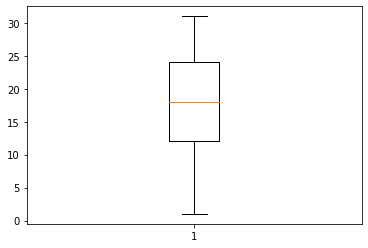

******************************************************************************************
month
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2., 2.]), array([3., 3.])]

caps: [array([2, 2]), array([3, 3])]

boxes: [array([2., 2., 3., 3., 2.])]

medians: [array([3., 3.])]

fliers: [array([], dtype=int64)]

means: []



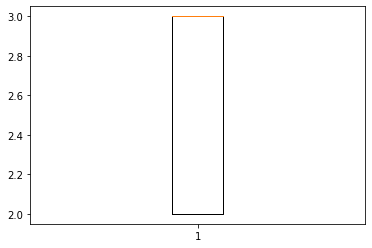

******************************************************************************************
year
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2022., 2022.]), array([2022., 2022.])]

caps: [array([2022, 2022]), array([2022, 2022])]

boxes: [array([2022., 2022., 2022., 2022., 2022.])]

medians: [array([2022., 2022.])]

fliers: [array([], dtype=int64)]

means: []



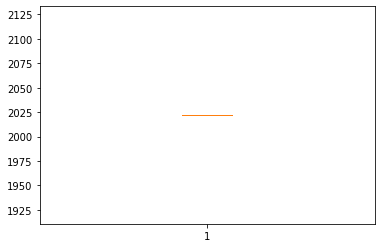

******************************************************************************************
dep_hour
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([8., 0.]), array([18., 23.])]

caps: [array([0, 0]), array([23, 23])]

boxes: [array([ 8.,  8., 18., 18.,  8.])]

medians: [array([12., 12.])]

fliers: [array([], dtype=int64)]

means: []



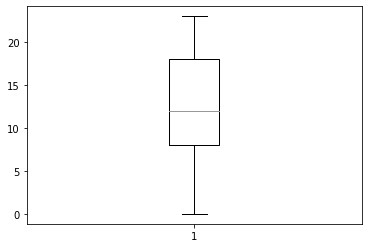

******************************************************************************************
dep_min
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([10.,  0.]), array([45., 55.])]

caps: [array([0, 0]), array([55, 55])]

boxes: [array([10., 10., 45., 45., 10.])]

medians: [array([30., 30.])]

fliers: [array([], dtype=int64)]

means: []



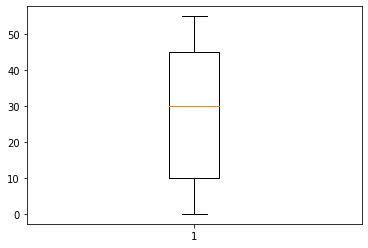

******************************************************************************************
arr_hour
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([10.,  0.]), array([20., 23.])]

caps: [array([0, 0]), array([23, 23])]

boxes: [array([10., 10., 20., 20., 10.])]

medians: [array([17., 17.])]

fliers: [array([], dtype=int64)]

means: []



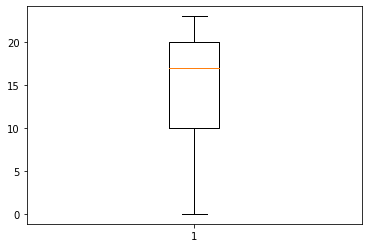

******************************************************************************************
arr_min
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([15.,  0.]), array([45., 59.])]

caps: [array([0, 0]), array([59, 59])]

boxes: [array([15., 15., 45., 45., 15.])]

medians: [array([30., 30.])]

fliers: [array([], dtype=int64)]

means: []



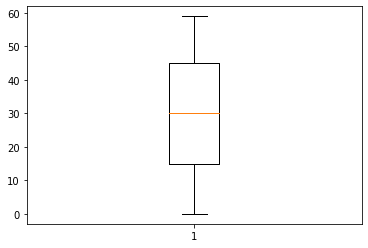

******************************************************************************************
dur_hour
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([6., 0.]), array([16., 31.])]

caps: [array([0, 0]), array([31, 31])]

boxes: [array([ 6.,  6., 16., 16.,  6.])]

medians: [array([11., 11.])]

fliers: [array([37, 36, 37, ..., 34, 32, 34])]

means: []



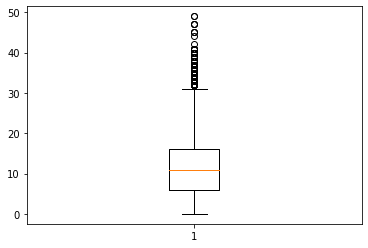

******************************************************************************************
dur_min
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([10.,  0.]), array([40., 59.])]

caps: [array([0, 0]), array([59, 59])]

boxes: [array([10., 10., 40., 40., 10.])]

medians: [array([25., 25.])]

fliers: [array([], dtype=int64)]

means: []



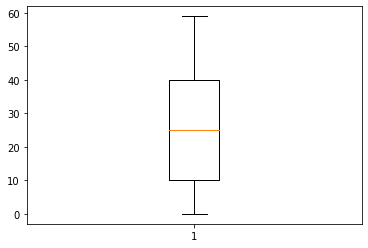

******************************************************************************************
airline_AirAsia
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



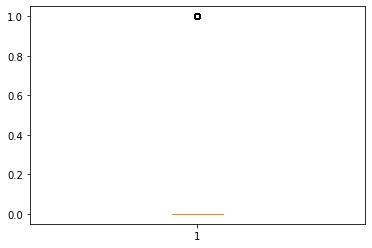

******************************************************************************************
airline_GO FIRST
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



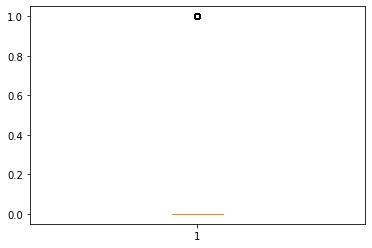

******************************************************************************************
airline_Indigo
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



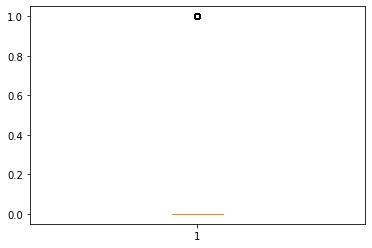

******************************************************************************************
airline_SpiceJet
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



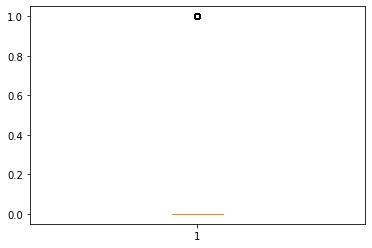

******************************************************************************************
airline_StarAir
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

means: []



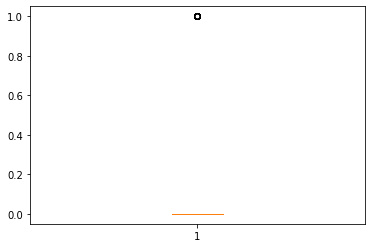

******************************************************************************************
airline_Trujet
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

means: []



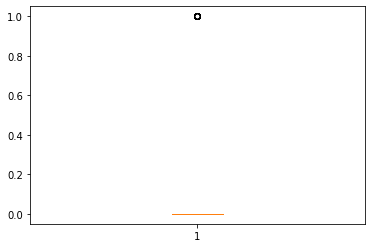

******************************************************************************************
airline_Vistara
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([1., 1.])]

caps: [array([0, 0]), array([1, 1])]

boxes: [array([0., 0., 1., 1., 0.])]

medians: [array([0., 0.])]

fliers: [array([], dtype=int64)]

means: []



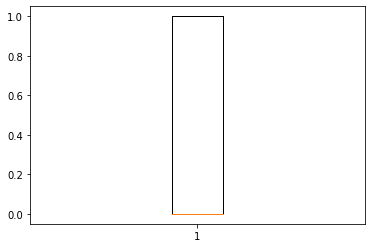

******************************************************************************************
from_Chennai
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



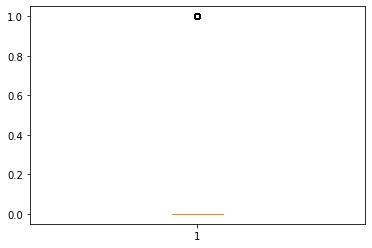

******************************************************************************************
from_Delhi
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



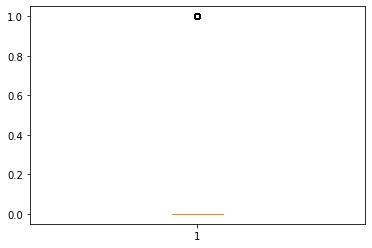

******************************************************************************************
from_Hyderabad
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



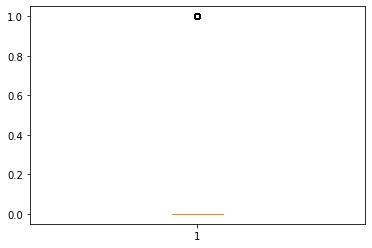

******************************************************************************************
from_Kolkata
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



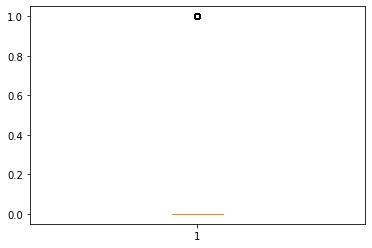

******************************************************************************************
from_Mumbai
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



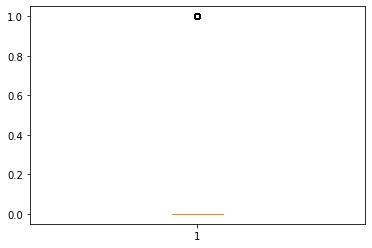

******************************************************************************************
to_Chennai
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



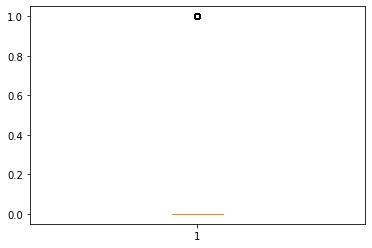

******************************************************************************************
to_Delhi
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



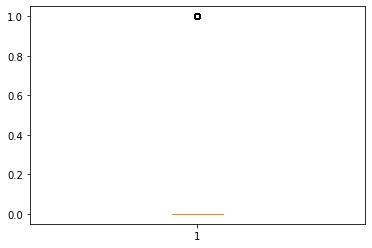

******************************************************************************************
to_Hyderabad
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



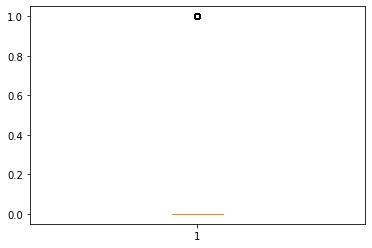

******************************************************************************************
to_Kolkata
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



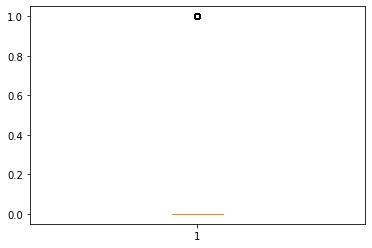

******************************************************************************************
to_Mumbai
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



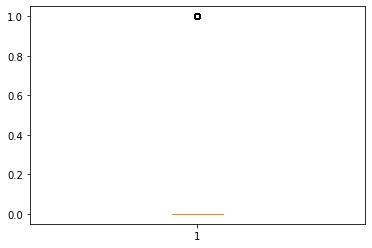

******************************************************************************************
ch_code_6E
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



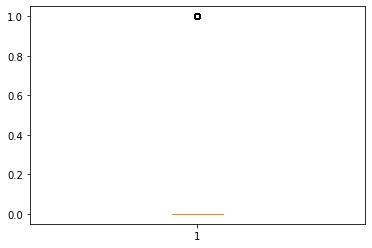

******************************************************************************************
ch_code_AI
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([1., 1.])]

caps: [array([0, 0]), array([1, 1])]

boxes: [array([0., 0., 1., 1., 0.])]

medians: [array([0., 0.])]

fliers: [array([], dtype=int64)]

means: []



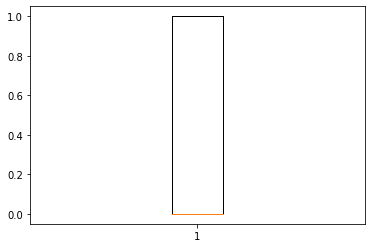

******************************************************************************************
ch_code_G8
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



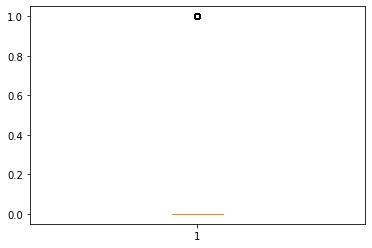

******************************************************************************************
ch_code_I5
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



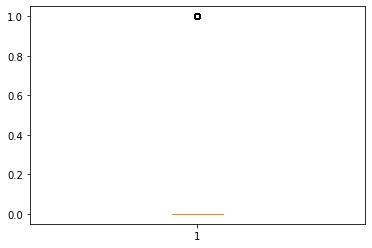

******************************************************************************************
ch_code_S5
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

means: []



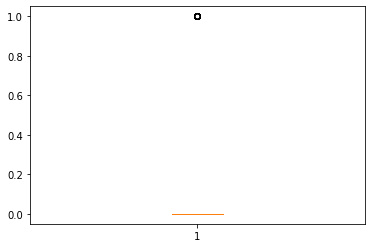

******************************************************************************************
ch_code_SG
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0, 0]), array([0, 0])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, ..., 1, 1, 1])]

means: []



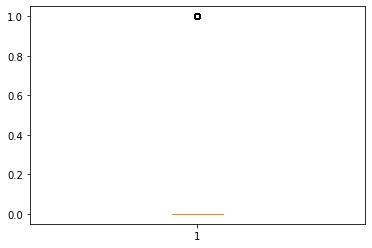

******************************************************************************************
ch_code_UK
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([1., 1.])]

caps: [array([0, 0]), array([1, 1])]

boxes: [array([0., 0., 1., 1., 0.])]

medians: [array([0., 0.])]

fliers: [array([], dtype=int64)]

means: []



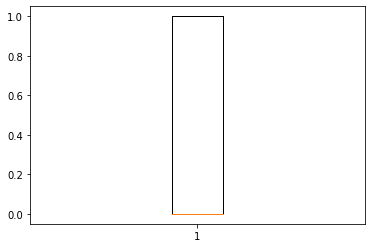

******************************************************************************************


In [112]:
for col in fpp_num_colms:
    print(col)
    bp=plt.boxplot(fpp[col].dropna(), showcaps=True)
    print(bp.keys())
    for key in bp:
        print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')
    plt.show()
    print('***'*30)

**Model Building**

In [114]:
fpp.columns

Index(['num_code', 'stop', 'price', 'day', 'month', 'year', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'dur_hour', 'dur_min',
       'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'ch_code_6E', 'ch_code_AI', 'ch_code_G8',
       'ch_code_I5', 'ch_code_S5', 'ch_code_SG', 'ch_code_UK'],
      dtype='object')

In [115]:
fpp.shape

(300255, 36)

In [116]:
fpp.dtypes

num_code            int64
stop                int64
price               int64
day                 int64
month               int64
year                int64
dep_hour            int64
dep_min             int64
arr_hour            int64
arr_min             int64
dur_hour            int64
dur_min             int64
airline_AirAsia     int64
airline_GO FIRST    int64
airline_Indigo      int64
airline_SpiceJet    int64
airline_StarAir     int64
airline_Trujet      int64
airline_Vistara     int64
from_Chennai        int64
from_Delhi          int64
from_Hyderabad      int64
from_Kolkata        int64
from_Mumbai         int64
to_Chennai          int64
to_Delhi            int64
to_Hyderabad        int64
to_Kolkata          int64
to_Mumbai           int64
ch_code_6E          int64
ch_code_AI          int64
ch_code_G8          int64
ch_code_I5          int64
ch_code_S5          int64
ch_code_SG          int64
ch_code_UK          int64
dtype: object

In [117]:
# train,test splitting 
X = fpp.drop('price', axis=1)
X.head(5)

,num_code,stop,day,month,year,dep_hour,dep_min,arr_hour,arr_min,dur_hour,...,to_Hyderabad,to_Kolkata,to_Mumbai,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,868,39,11,2,2022,18,0,20,0,2,...,0,0,1,0,1,0,0,0,0,0
1,624,39,11,2,2022,19,0,21,15,2,...,0,0,1,0,1,0,0,0,0,0
2,531,0,11,2,2022,20,0,20,45,24,...,0,0,1,0,1,0,0,0,0,0
3,839,0,11,2,2022,21,25,23,55,26,...,0,0,1,0,1,0,0,0,0,0
4,544,0,11,2,2022,17,15,23,55,6,...,0,0,1,0,1,0,0,0,0,0


In [118]:
Y = fpp['price']
Y.head(5)

0    25612
1    25612
2    42220
3    44450
4    46690
Name: price, dtype: int64

In [119]:
print(X.shape)
print(' ')
print(Y.shape)

(300255, 35)
 
(300255,)


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [133]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240204, 35)
(240204,)
(60051, 35)
(60051,)


In [132]:
# Import required libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [134]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [136]:
sk_model.fit(X_train, Y_train)

Lasso()

In [137]:
sk_test_data_prediction = sk_model.predict(X_test)

In [140]:
# Evaluate the model on the test set
y_pred = sk_model.predict(X_test)
error = np.mean((Y_test - y_pred) ** 2)
print("Test MSE :", error)

Test MSE : 381911109.1871878


In [141]:
from sklearn import metrics
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

print("R squared error 1 : ", score_1_)

R squared error 1 :  0.2564380019036422


In [ ]:
prediction = .predict(X_test)

In [ ]:
print('MAE:', mean_absolute_error(Y_test, prediction))
print('MSE:', mean_squared_error(Y_test, prediction))

MAE: 14007.570221999164
MSE: 333495049.22019094
